In [149]:
%matplotlib inline

In [150]:
from datetime import datetime

from matplotlib import pyplot, rcParams
import pandas
import seaborn

In [151]:
seaborn.set(style='darkgrid', palette='Set2')
rcParams['savefig.dpi'] = 300
chosenPalette='Set2'

In [152]:
def dateParser(*args):
    return datetime.strptime('-'.join([str(arg) for arg in args]),'%y-%m-%d-%H-%M')

In [153]:
data = pandas.read_csv('coffee-tracker.csv', header=None,
                       parse_dates=[[0, 1, 2, 3, 4]],
                       date_parser=dateParser)

In [154]:
data.columns = ['Datetime', 'Drink', 'Location', 'City', 'State']

In [173]:
data['date'] = pandas.Series([xx.date() for xx in data.Datetime])
data['Local Time'] = pandas.Series([xx.hour + xx.minute / 60. for xx in data.Datetime])
data['Weekday'] = pandas.Series([xx.weekday_name for xx in data.Datetime])

In [174]:
startEndDays = (data.Datetime.min().date(), data.Datetime.max().date())

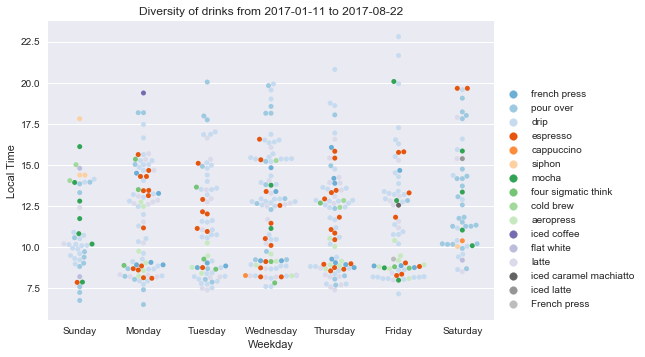

In [175]:
seaborn.swarmplot(data=data, x='Weekday', y='Local Time', hue='Drink', palette='Vega20c',
                       order=['Sunday','Monday','Tuesday','Wednesday', 'Thursday','Friday','Saturday'])
lgd = pyplot.legend(bbox_to_anchor=(1.0, 0.8))
pyplot.title('Diversity of drinks from {} to {}'.format(*startEndDays))
pyplot.savefig('drinkTypes.png', bbox_extra_artists=(lgd, ), bbox_inches='tight')

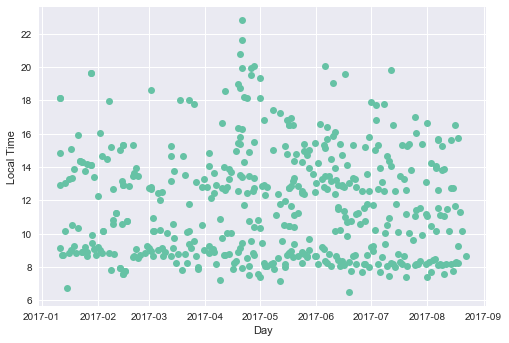

In [157]:
pyplot.plot(data['date'],data['Local Time'], 'o')
pyplot.xlabel('Day')
pyplot.ylabel('Local Time')
pyplot.savefig('drinkTimes.png')


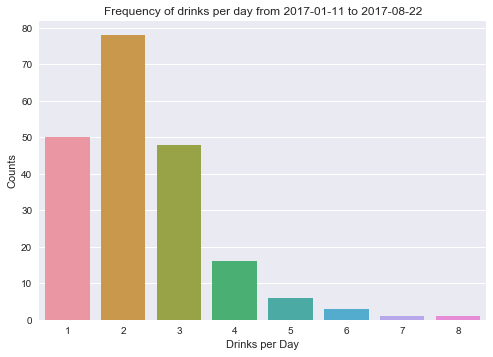

In [176]:
drinksPerDay = pandas.DataFrame({'Drinks Per Day': data.date.value_counts()})
seaborn.countplot(data=drinksPerDay, x='Drinks Per Day')
pyplot.xlabel('Drinks per Day')
pyplot.ylabel('Counts')
pyplot.title('Frequency of drinks per day from {} to {}'.format(*startEndDays))
pyplot.savefig('drinkCounts.png')

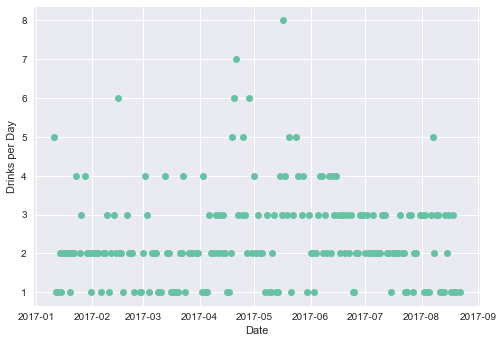

In [159]:
pyplot.plot(drinksPerDay.index, drinksPerDay.iloc[:, 0], 'o')
pyplot.xlabel('Date')
pyplot.ylabel('Drinks per Day')
pyplot.savefig('dailyDrinks.png')

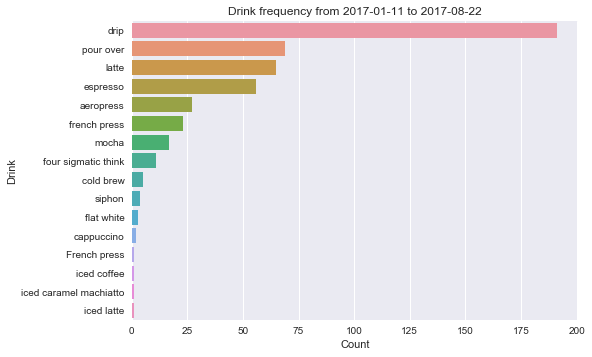

In [177]:
seaborn.countplot(data=data, y='Drink', order=data.Drink.value_counts().index)
pyplot.xlabel('Count')
pyplot.title('Drink frequency from {} to {}'.format(*startEndDays))
pyplot.savefig('numDrinkTypes.png', bbox_inches='tight')

In [161]:
summerWork = data.loc[(data['Location']=='work') & (data['State'] == 'WA')]

In [179]:
internStartEnd = (summerWork.Datetime.min().date(), summerWork.Datetime.max().date())

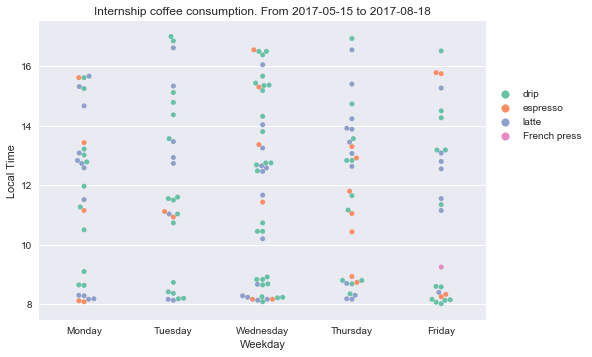

In [182]:
seaborn.swarmplot(data=summerWork, x='Weekday', y='Local Time', hue='Drink')
lgd = pyplot.legend(bbox_to_anchor=(1.0, 0.8))
pyplot.title('Internship coffee consumption. From {} to {}'.format(*internStartEnd))
pyplot.savefig('internship.png', extra=(lgd, ))

In [165]:
summerWork.shape

(154, 8)

In [170]:
summerWork.Datetime.max().date() - summerWork.Datetime.min().date()

datetime.timedelta(95)